In [1]:
import os

In [368]:
os.getcwd()

'/Users/george/Desktop/GENOM_project'

In [372]:
c = pd.read_csv('../../Downloads/filereport_read_run_SAMEA4717418_tsv.txt', sep = '\t')

In [373]:
c.head()

,study_accession,sample_accession,experiment_accession,run_accession,tax_id,scientific_name,fastq_ftp,submitted_ftp,sra_ftp
0,PRJEB27192,SAMEA4717418,ERX2639394,ERR2622854,256318,metagenome,ftp.sra.ebi.ac.uk/vol1/fastq/ERR262/004/ERR262...,ftp.sra.ebi.ac.uk/vol1/run/ERR262/ERR2622854/1...,ftp.sra.ebi.ac.uk/vol1/err/ERR262/004/ERR2622854


In [350]:
from Bio.Blast import NCBIWWW

In [363]:
NCBIWWW. tt[:-2]

'TACGTAGGTGGCAAGCGTTATCCGGAATTATTGGGCGTAAAGCGCGCGTAGGCGGTTTTTTAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAACTGCATTTGAAACTGGAAAACTTGAGTGCAGAAGAGGAAAGTGGAATTCCATG'

In [357]:
f = open('../../Downloads/ERR1074498_FASTQ_16SrRNA.fasta')

In [361]:
tt = f.readline()

In [310]:
from Bio import Phylo

In [346]:
trees = Phylo.read('../../Downloads/ERR1074498_FASTQ_pruned.tree', 'newick')

In [348]:
trees.ladderize()

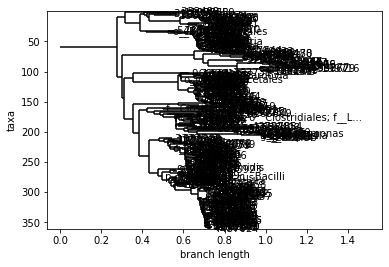

In [349]:
Phylo.draw(trees)

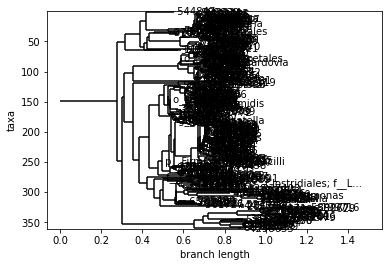

In [345]:
i= 0
for tree in trees:
    Phylo.draw(tree)

In [2]:
import numpy as np
import pandas as pd

In [39]:
df['id'] = df[df.columns[0]].str.replace(r';*[a-z]_+', ' ').str.replace(r' +', ' ')
df.id.isna().sum()
df.id[1020:1040].str.split(' ').str[-1]

1020    ATCC_23263
1021            A2
1022     2_1_46FAA
1023          28-4
1024          10-1
1025           3-1
1026           3-2
1027       TF01-11
1028          COE1
1029            A4
1030         C6A11
1031        AC2028
1032        AC2014
1033        AB2028
1034        AD3010
1035        AC3007
1036          P6A3
1037         M18-1
1038        ND2006
1039        MA2020
Name: id, dtype: object

[' Bacteria Bacteroidetes Bacteroidia Bacteroidales Bacteroidaceae Bacteroides Bacteroide stercoris Bacteroide stercori ATCC_43183',
 ' Bacteria Bacteroidetes Bacteroidia Bacteroidales',
 ' Bacteria Actinobacteria Actinobacteria Bifidobacteriales Bifidobacteriaceae Bifidobacterium Bifidobacteriu adolescentis Bifidobacteriu adolescenti ATCC_15703',
 ' Archaea Euryarchaeota Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter Methanobrevibacte smithii Methanobrevibacte smithi ATCC_35061',
 nan,
 ' Archaea Euryarchaeota Methanobacteria Methanobacteriales Methanobacteriaceae',
 ' Archaea Euryarchaeota Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter',
 ' Archaea Euryarchaeota Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter Methanobrevibacte arboriphilus Methanobrevibacte arboriphilu ANOR1',
 ' Archaea Euryarchaeota Methanobacteria Methanobacteriales Methanobacteriaceae Methanobrevibacter Methanobrevibacte millerae',
 '

In [120]:
#df = pd.read_csv( "https://storage.googleapis.com/gbsc-gcp-project-ipop_public/Exercise/metabolome_abundance/Metabolomics.csv")

df = pd.read_csv("https://storage.googleapis.com/gbsc-gcp-project-ipop_public/HMP/gut_16s_abundance/gut_16s_abundance.txt", sep = '\t')

In [63]:
df.head

0      ZOZOW1T-1010
1      ZOZOW1T-1011
2      ZOZOW1T-1012
3      ZOZOW1T-1015
4      ZOZOW1T-1021
           ...     
850    ZJTKAE3-2012
851    ZJTKAE3-2013
852    ZJTKAE3-2015
853    ZJTKAE3-6011
854    ZJTKAE3-6021
Name: SampleID, Length: 855, dtype: object

In [94]:
pd.Series( df.columns[1:] ).str.split('_').str[-1][0]

'Actinobacteria'

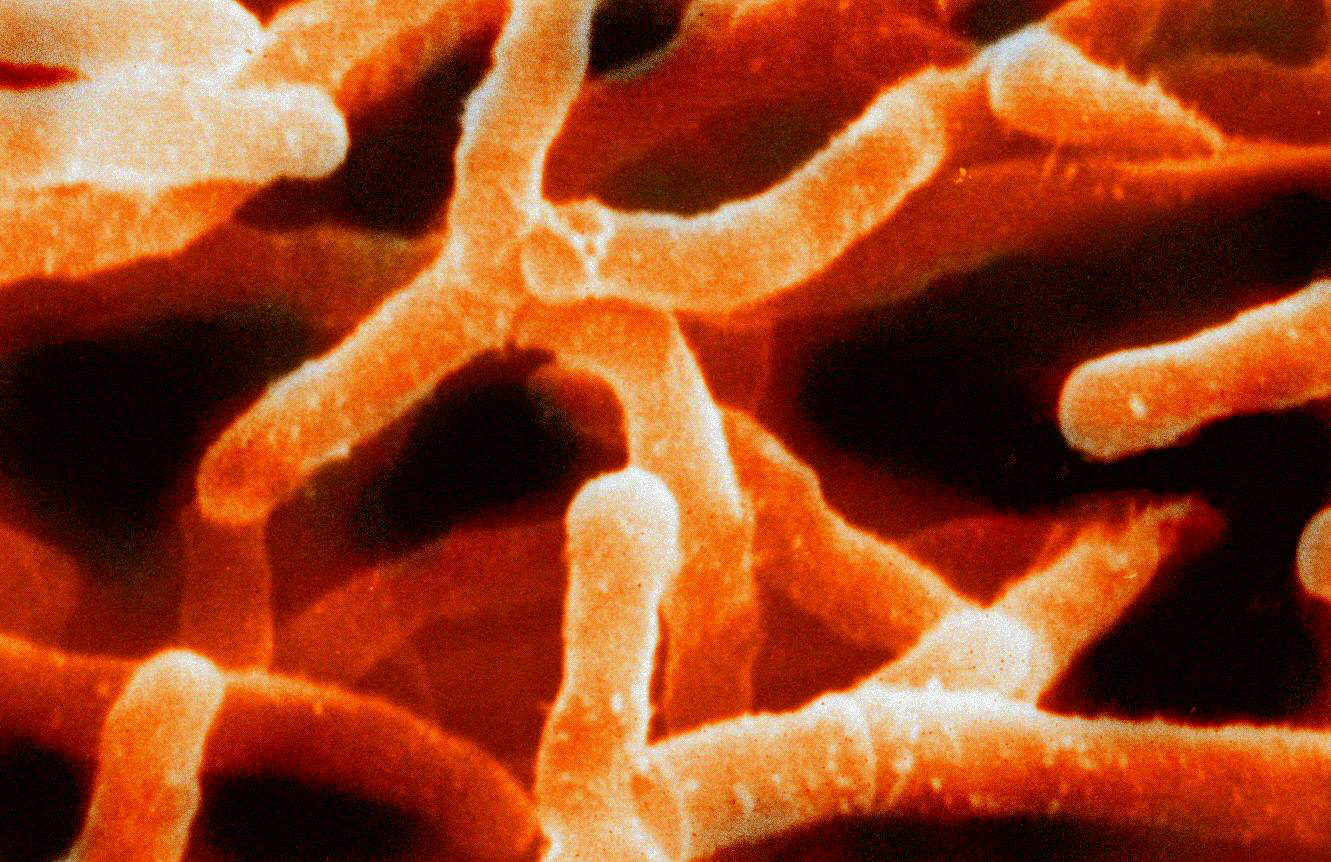

In [100]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(wiki.images[0])
img = Image.open(BytesIO(response.content))
img

In [138]:
taxa = pd.Series( df.columns[1:] ).str.split('_').str[-1].str.split('.').str[0]

In [103]:
len(taxa)

96

In [141]:
taxa

0          Actinobacteria
1           Bacteroidetes
2              Firmicutes
3          Proteobacteria
4         Verrucomicrobia
             ...         
91    Erysipelotrichaceae
92             Firmicutes
93        Lachnospiraceae
94     Porphyromonadaceae
95        Ruminococcaceae
Length: 96, dtype: object

In [142]:
df_taxa = pd.DataFrame(taxa)
df_taxa.columns = ['taxon']
df_taxa['description'] = '___'
df_taxa

,taxon,description
0,Actinobacteria,___
1,Bacteroidetes,___
2,Firmicutes,___
3,Proteobacteria,___
4,Verrucomicrobia,___
...,...,...
91,Erysipelotrichaceae,___
92,Firmicutes,___
93,Lachnospiraceae,___
94,Porphyromonadaceae,___


In [157]:
# Import package
import wikipedia

for i in range(len(taxa)):
    # Specify the title of the Wikipedia page
    try:
        wiki = wikipedia.page( taxa[i] )
        text = wiki.summary
    except:
        try: 
            wiki = wikipedia.page( wikipedia.search( taxa[i] )[0] )
            text = wiki.summary
        except:
            text = taxa[i]
            
    #store text in dataframe
    df_taxa.description[i] = text
    

/Users/george/anaconda2/envs/SBERT-WK/lib/python3.7/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /Users/george/anaconda2/envs/SBERT-WK/lib/python3.7/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [158]:
df_taxa

,taxon,description
0,Actinobacteria,The Actinobacteria are a phylum of Gram-posit...
1,Bacteroidetes,The phylum Bacteroidetes is composed of three ...
2,Firmicutes,"The Firmicutes (Latin: firmus, strong, and cut..."
3,Proteobacteria,Proteobacteria is a major phylum of Gram-negat...
4,Verrucomicrobia,Verrucomicrobia is a phylum of bacteria that c...
...,...,...
91,Erysipelotrichaceae,The Erysipelotrichaceae are a family of Gram-p...
92,Firmicutes,"The Firmicutes (Latin: firmus, strong, and cut..."
93,Lachnospiraceae,"The Lachnospiraceae are a family of anaerobic,..."
94,Porphyromonadaceae,The Porphyromonadaceae family of bacteria is ...


In [152]:
pd.Series( df.columns[1:] ).loc[ df_taxa.description.str.contains('Clostridium') ]

10                     class_Clostridia
20                  order_Clostridiales
32              family_Clostridiaceae.1
49    family_unclassified_Clostridiales
61                 genus_Clostridium.IV
62                 genus_Clostridium.XI
63              genus_Clostridium.XVIII
64               genus_Clostridium.XlVa
65               genus_Clostridium.XlVb
66      genus_Clostridium.sensu.stricto
88     genus_unclassified_Clostridiales
dtype: object

In [64]:
Q = df.drop(df.columns[0], axis = 1)
Q = Q.div(Q.sum(axis=1), axis=0)

In [160]:
embedding = embed_method.embed(params, all_layer_embedding)

,taxon,description
73,Flavonifractor,___
82,Pseudoflavonifractor,___


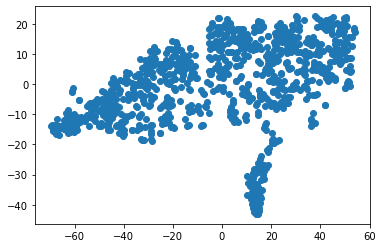

In [65]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pc = PCA(n_components = 75)
x = pc.fit_transform(np.array( Q, dtype = 'float64'))
ts = TSNE(perplexity = 25)
xx = ts.fit_transform(x)

plt.scatter(xx[:, 0], xx[:, 1])
plt.show()

In [66]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
 
class generate_embedding():
 
    def __init__(self, embed_method, masks):
        # Select from embedding methods
        switcher = {
            'ave_last_hidden': self.ave_last_hidden,
            'CLS': self.CLS,
            'dissecting': self.dissecting,
            'ave_one_layer': self.ave_one_layer,
        }
       
        self.masks = masks
        self.embed = switcher.get(embed_method, 'Not a valide method index.')
 
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # 'ave_last_hidden': self.ave_last_hidden,
    def ave_last_hidden(self, params, all_layer_embedding):
        """
            Average the output from last layer
        """
        unmask_num = np.sum(self.masks, axis=1) - 1 # Not considering the last item
       
        embedding = []
        for i in range(len(unmask_num)):
            sent_len = unmask_num[i]
            hidden_state_sen = all_layer_embedding[i][-1,:,:]
            embedding.append(np.mean(hidden_state_sen[:sent_len,:], axis=0))
 
        embedding = np.array(embedding)
        return embedding
 
 
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # 'ave_last_hidden': self.ave_last_hidden,
    def ave_one_layer(self, params, all_layer_embedding):
        """
            Average the output from last layer
        """
        unmask_num = np.sum(self.masks, axis=1) - 1 # Not considering the last item
       
        embedding = []
        for i in range(len(unmask_num)):
            sent_len = unmask_num[i]
            hidden_state_sen = all_layer_embedding[i][params['layer_start'],:,:]
            embedding.append(np.mean(hidden_state_sen[:sent_len,:], axis=0))
 
        embedding = np.array(embedding)
        return embedding
 
 
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # 'CLS': self.CLS,
    def CLS(self, params, all_layer_embedding):
        """
            CLS vector as embedding
        """
        unmask_num = np.sum(self.masks, axis=1) - 1 # Not considering the last item
       
        embedding = []
        for i in range(len(unmask_num)):
            sent_len = unmask_num[i]
            hidden_state_sen = all_layer_embedding[i][-1,:,:]
            embedding.append(hidden_state_sen[0])
 
        embedding = np.array(embedding)
        return embedding
 
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # 'dissecting': self.dissecting,
    def dissecting(self, params, all_layer_embedding):
        """
            dissecting deep contextualized model
        """
        unmask_num = np.sum(self.masks, axis=1) - 1 # Not considering the last item
        all_layer_embedding = np.array(all_layer_embedding)[:,params['layer_start']:,:,:] # Start from 4th layers output
 
        embedding = []
        # One sentence at a time
        for sent_index in range(len(unmask_num)):
            sentence_feature = all_layer_embedding[sent_index,:,:unmask_num[sent_index],:]
            one_sentence_embedding = []
            # Process each token
            for token_index in range(sentence_feature.shape[1]):
                token_feature = sentence_feature[:,token_index,:]
                # 'Unified Word Representation'
                token_embedding = self.unify_token(params, token_feature)
                one_sentence_embedding.append(token_embedding)
 
            one_sentence_embedding = np.array(one_sentence_embedding)
            sentence_embedding = self.unify_sentence(params, sentence_feature, one_sentence_embedding)
            embedding.append(sentence_embedding)
 
        embedding = np.array(embedding)
 
        return embedding
 
    def unify_token(self, params, token_feature):
        """
            Unify Token Representation
        """
        window_size = params['context_window_size']
 
        alpha_alignment = np.zeros(token_feature.shape[0])
        alpha_novelty = np.zeros(token_feature.shape[0])
       
        for k in range(token_feature.shape[0]):
        
            left_window = token_feature[k-window_size:k,:]
            right_window = token_feature[k+1:k+window_size+1,:]
            window_matrix = np.vstack([left_window, right_window, token_feature[k,:][None,:]])
           
            Q, R = np.linalg.qr(window_matrix.T) # This gives negative weights
 
            q = Q[:, -1]
            r = R[:, -1]
            alpha_alignment[k] = np.mean(normalize(R[:-1,:-1],axis=0),axis=1).dot(R[:-1,-1]) / (np.linalg.norm(r[:-1]))
            alpha_alignment[k] = 1/(alpha_alignment[k]*window_matrix.shape[0]*2)
            alpha_novelty[k] = abs(r[-1]) / (np.linalg.norm(r))
           
        
        # Sum Norm
        alpha_alignment = alpha_alignment / np.sum(alpha_alignment) # Normalization Choice
        alpha_novelty = alpha_novelty / np.sum(alpha_novelty)
 
        alpha = alpha_novelty + alpha_alignment
       
        alpha = alpha / np.sum(alpha) # Normalize
       
        out_embedding = token_feature.T.dot(alpha)
        
 
        return out_embedding
 
    def unify_sentence(self, params, sentence_feature, one_sentence_embedding):
        """
            Unify Sentence By Token Importance
        """
        sent_len = one_sentence_embedding.shape[0]
 
        var_token = np.zeros(sent_len)
        for token_index in range(sent_len):
            token_feature = sentence_feature[:,token_index,:]
            sim_map = cosine_similarity(token_feature)
            var_token[token_index] = np.var(sim_map.diagonal(-1))
 
        var_token = var_token / np.sum(var_token)
 
        sentence_embedding = one_sentence_embedding.T.dot(var_token)
 
        return sentence_embedding
 

In [67]:
from __future__ import absolute_import, division, unicode_literals
 
import sys
import io
import numpy as np
import logging
import argparse
import torch
import random
 
from transformers import *

In [68]:
df.columns[1:]

Index(['phylum_Actinobacteria', 'phylum_Bacteroidetes', 'phylum_Firmicutes',
       'phylum_Proteobacteria', 'phylum_Verrucomicrobia',
       'phylum_unclassified_Bacteria', 'class_Actinobacteria', 'class_Bacilli',
       'class_Bacteroidia', 'class_Betaproteobacteria', 'class_Clostridia',
       'class_Deltaproteobacteria', 'class_Erysipelotrichia',
       'class_Gammaproteobacteria', 'class_Negativicutes',
       'class_Verrucomicrobiae', 'class_unclassified_Bacteria',
       'class_unclassified_Firmicutes', 'order_Bacteroidales',
       'order_Burkholderiales', 'order_Clostridiales',
       'order_Coriobacteriales', 'order_Desulfovibrionales',
       'order_Enterobacteriales', 'order_Erysipelotrichales',
       'order_Lactobacillales', 'order_Selenomonadales',
       'order_Verrucomicrobiales', 'order_unclassified_Bacteria',
       'order_unclassified_Firmicutes', 'family_Acidaminococcaceae',
       'family_Bacteroidaceae', 'family_Clostridiaceae.1',
       'family_Clostridiales_Inc

In [69]:
embedding

array([[ 9.20368111e-02,  8.40242025e-01, -7.99725039e-02, ...,
         2.57610730e-02,  7.69688137e-02,  1.85611756e-01],
       [ 9.68509483e-02,  6.90556147e-01,  3.55166128e-03, ...,
         8.83862779e-02, -2.03464279e-01, -2.76386147e-01],
       [-8.29121639e-04,  4.47853339e-01,  2.00849244e-01, ...,
        -1.50313760e-01, -4.84386784e-01,  1.20601163e-02],
       ...,
       [ 2.80581220e-01,  8.34841212e-01,  5.24005103e-01, ...,
        -5.03148413e-01,  4.07770842e-01, -5.44509172e-01],
       [ 5.04807018e-01,  8.12006468e-01,  5.56830238e-01, ...,
        -3.95111335e-01,  2.51865485e-01, -2.97416282e-01],
       [ 1.15538371e-01,  1.00748311e+00,  6.00336188e-01, ...,
        -4.68258054e-01,  4.91589565e-01, -4.38139746e-01]])

In [70]:
import re

In [71]:
#model_name = "cambridgeltl/SapBERT-from-PubMedBERT-fulltext"
#model_name = "ttumyche/bluebert"
model_name  ='allenai/scibert_scivocab_uncased'
#model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
#model_name = "dmis-lab/biobert-large-cased-v1.1"
#model_name = "emilyalsentzer/Bio_ClinicalBERT"
#model_name = "GanjinZero/UMLSBert_ENG"
#model_name = "allenai/biomed_roberta_base"
config = AutoConfig.from_pretrained(model_name, cache_dir="./cache/" + re.split('/', model_name)[1])
config.output_hidden_states = True
tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir="./cache/" + re.split('/', model_name)[1])
model = AutoModel.from_pretrained(
        model_name, config=config, cache_dir="./cache/"+re.split('/', model_name)[1]
    )

In [72]:
                                                                                                     
sentence4 = "Unilateral primary osteoarthritis, right hip"
sentence5 = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."
sentence3 = "Rheumatic mitral valve diseases"
sentence2 = "Dissection of thoracic aorta"
sentence1 = "Otosclerosis"
sentence6 = "Spinal osteochondrosis"
sentence7 = "Furthermore, increased CREB expression in breast tumors is associated with poor prognosis, shorter survival and higher risk of metastasis."
sentence8 = "I like popcorn!"
sentence9 = "I like icecream!"
 
sentences = [sentence1, sentence2, sentence3,
            sentence4, sentence5, sentence6,
            sentence7, sentence8, sentence9]

In [73]:
sentences = df.columns[1:]

In [179]:
sentences_index = \
[tokenizer.encode(s, add_special_tokens=True) for s in df_taxa.description]

In [180]:
#sentences_index = [tokenizer.encode(s, add_special_tokens=True) for s in sentences]
features_input_ids = []
features_mask = []
max_seq_len = 256
for sent_ids in sentences_index:
        # Truncate if too long
    if len(sent_ids) > max_seq_len:
        sent_ids = sent_ids[: max_seq_len]
    sent_mask = [1] * len(sent_ids)
        # Padding
    padding_length = max_seq_len - len(sent_ids)
    sent_ids += [0] * padding_length
    sent_mask += [0] * padding_length
        # Length Check
    assert len(sent_ids) == max_seq_len
    assert len(sent_mask) == max_seq_len
 
    features_input_ids.append(sent_ids)
    features_mask.append(sent_mask)

    

In [181]:
features_mask = np.array(features_mask)
device = "cpu"
batch_input_ids = torch.tensor(features_input_ids, dtype=torch.long)
batch_input_mask = torch.tensor(features_mask, dtype=torch.long)
batch = [batch_input_ids.to(device), batch_input_mask.to(device)]
 
inputs = {"input_ids": batch[0], "attention_mask": batch[1]}

In [182]:
model.zero_grad()
 
with torch.no_grad():
    features = model(**inputs)[2]

    
all_layer_embedding = torch.stack(features).permute(1, 0, 2, 3).cpu().numpy()

params = {'layer_start':4,'context_window_size':4,'embed_method':'dissecting'}

embed_method = generate_embedding(params['embed_method'], features_mask)
embedding = embed_method.embed(params, all_layer_embedding)

tok_ = 0
for emb_ in embedding:
    tok_+=1
    similarity = embedding[0].dot(emb_)/ (np.linalg.norm(embedding[0]) * np.linalg.norm(emb_))
    print(f'{tok_} - {similarity}')
 

1 - 0.9999999999999998
2 - 0.9591540765179399
3 - 0.9727422587408575
4 - 0.979223252660332
5 - 0.9608170674425247
6 - 0.9793095206522057
7 - 0.9999999999999998
8 - 0.913519777567136
9 - 0.9445441117451088
10 - 0.9686760920607617
11 - 0.9799417603627515
12 - 0.9019345792537246
13 - 0.9132166398261649
14 - 0.9182387954325321
15 - 0.9697757362687655
16 - 0.9608170674425247
17 - 0.9793095206522057
18 - 0.9727422587408575
19 - 0.8952658793845866
20 - 0.9433357008478215
21 - 0.9799417603627515
22 - 0.9076650589872177
23 - 0.9405257279028737
24 - 0.8422717193922034
25 - 0.9132166398261649
26 - 0.9641671071891871
27 - 0.9544674344453092
28 - 0.9587573119162318
29 - 0.9793095206522057
30 - 0.9727422587408575
31 - 0.9697757362687655
32 - 0.9246340037952593
33 - 0.9481362125717038
34 - 0.92400135259127
35 - 0.9076650589872177
36 - 0.9405257279028737
37 - 0.9658095716816579
38 - 0.8389721670347192
39 - 0.9439336072114345
40 - 0.9128665478856819
41 - 0.8559300392511708
42 - 0.966341409911038
43 - 0

In [187]:
embedding.shape

(96, 768)

In [364]:
# df_taxa['embedding'] = embedding
# df_taxa.head(10)

In [168]:
len(embedding)

96

In [177]:
emb_matrix = np.concatenate( embedding, axis=0 ).reshape( (embedding[0].shape[0], len(embedding))).T

In [178]:
emb_matrix.shape

(10, 768)

In [191]:
embedding.shape

(96, 768)

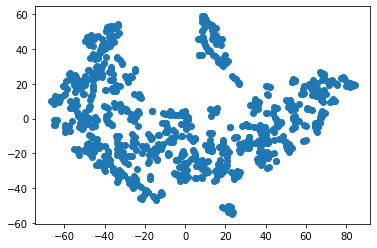

In [242]:
#to be clear --> this is NOT a good way to use the embeddings
A = ( Q.values @ embedding )



pc = PCA(n_components = 25)
x = pc.fit_transform( A )
ts = TSNE(perplexity = 10)
xx = ts.fit_transform(x)

plt.scatter(xx[:, 0], xx[:, 1])
plt.show()

Plot above ==> incorporating Scibert in a basic way to create embeddings
<br>
Plot below ==> only using PCA/tSNE

In [217]:
from sklearn.cluster import DBSCAN, KMeans

dbs = KMeans()
L = dbs.fit_predict(embedding)

In [219]:
L

array([4, 0, 4, 4, 4, 4, 4, 2, 7, 4, 4, 7, 2, 2, 4, 4, 4, 4, 2, 0, 4, 2,
       0, 6, 2, 4, 4, 0, 4, 4, 4, 2, 4, 5, 2, 0, 4, 6, 7, 2, 6, 7, 2, 7,
       2, 2, 4, 4, 4, 4, 4, 2, 6, 3, 3, 0, 3, 7, 7, 6, 6, 0, 0, 0, 0, 0,
       0, 2, 7, 3, 7, 5, 7, 1, 3, 5, 6, 7, 3, 4, 4, 7, 1, 2, 4, 4, 7, 4,
       4, 5, 2, 6, 4, 7, 6, 7], dtype=int32)

In [221]:
df_taxa.iloc[ L == 3 ].description[53]

'Anaerotruncus colihominis  is a Gram-positive, non-spore-forming, rod-shaped and anaerobic bacterium from the genus of Anaerotruncus which occur in human faeces.\n\n'

In [232]:
df_taxa.iloc[ L == 7 ].description[8]

"The class Bacteroidia is composed of two orders of bacteria, the Bacteroidales and the Marinilabiliales. Members of the order Bacteroidales are by far the most studied species within the phylum Bacteroidetes. Some species of the genus Bacteroides are opportunistic pathogens. Before the fourth volume of Bergey's Manual of Systematic Bacteriology came out, the class Bacteroidia was referred to as Bacteroidetes, like the phylum it belongs to.It includes members which are common in the human gastrointestinal microbiota, including Prevotella and Bacteroides.\n\n"

In [235]:
df_taxa.iloc[ L == 7 ].description[77]

'Oscillibacter valericigenes is a species of mesophilic bacterium identified in the alimentary canal of Japanese Corbicula clams. It is Gram-negative and anaerobic, with a straight to slightly curved rod-like morphology, and is motile with petritrichous flagella (i.e., flagella with diverse orientations from the cell body). It was not observed in culture to form spores.'

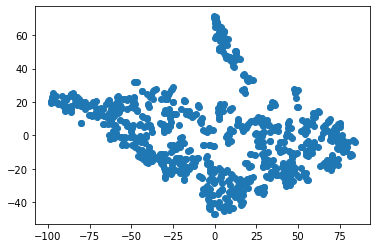

In [241]:
pc = PCA(n_components = 25)
x = pc.fit_transform(np.array( Q, dtype = 'float64'))
ts = TSNE(perplexity = 10)
xx = ts.fit_transform(x)

plt.scatter(xx[:, 0], xx[:, 1])
plt.show()